Consider three decision making models, $D_\text{ref}, D_1$ and $D_2$, in the following context. Given a stimulus $s\in [0,1]$, each model outputs a decision $d($

In [9]:
from dm import *
import matplotlib.pyplot as plt
from IPython.display import HTML
%matplotlib inline

In [12]:
# this cell hides all the code cells by default
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script><font size=4>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.</font>''')

(array([108., 102., 104., 106.,  71.,  99., 101., 106., 101., 102.]),
 array([0.00150335, 0.10132137, 0.20113939, 0.30095742, 0.40077544,
        0.50059346, 0.60041148, 0.70022951, 0.80004753, 0.89986555,
        0.99968357]),
 <a list of 1 Patch objects>)

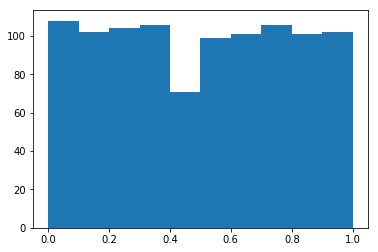

In [8]:
# plot stimulus
plt.hist(stim.sequence)

In [3]:
# decision makers
Dh = BernoulliDecisionMaker('Dh')
D1 = BernoulliDecisionMaker('D1')
D2 = BernoulliDecisionMaker('D2', bias=.7)

decision_makers = {Dh, D1, D2}

# generate decisions with all of them
for D in decision_makers:
    D.present_stimulus(stim.sequence)
    D.decisions = D.bernoulli_decide(D.perceived_stimulus)
    D.compute_accuracy(stim.correct)

In [4]:
# explore decision makers and compute some statistics
for D in decision_makers:
    print(D)
#     print(stim)
#     print(D.perceived_stimulus)
#     print(D.decisions)
#     print('\n')

name: D2
bias: 0.7
accuracy: 0.933

name: D1
bias: 0
accuracy: 0.762

name: Dh
bias: 0
accuracy: 0.765



In [5]:
# compare models in terms of percent match
for D in decision_makers - {Dh}:
    D.percent_match = np.sum(D.decisions == Dh.decisions) / len(stim.sequence)
    print(f"{D.name} {round(100 * D.percent_match,2)}%")

D2 73.4%
D1 67.1%
